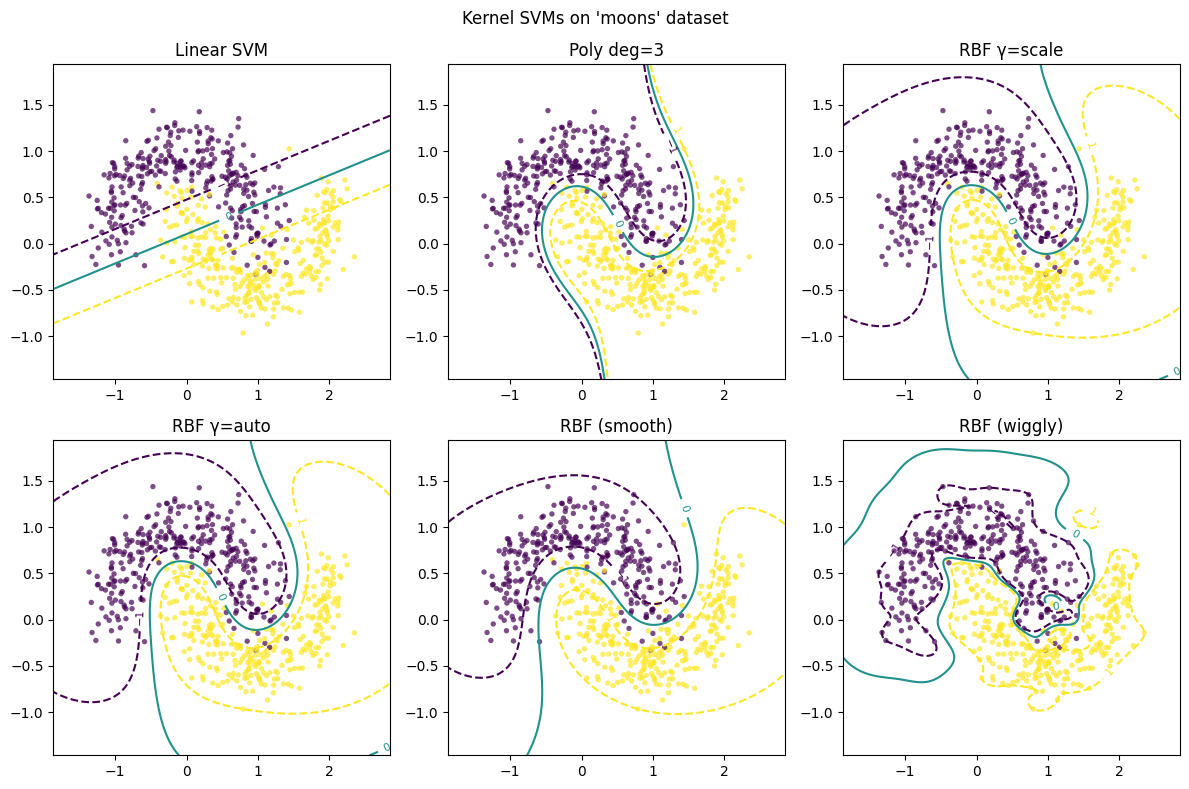

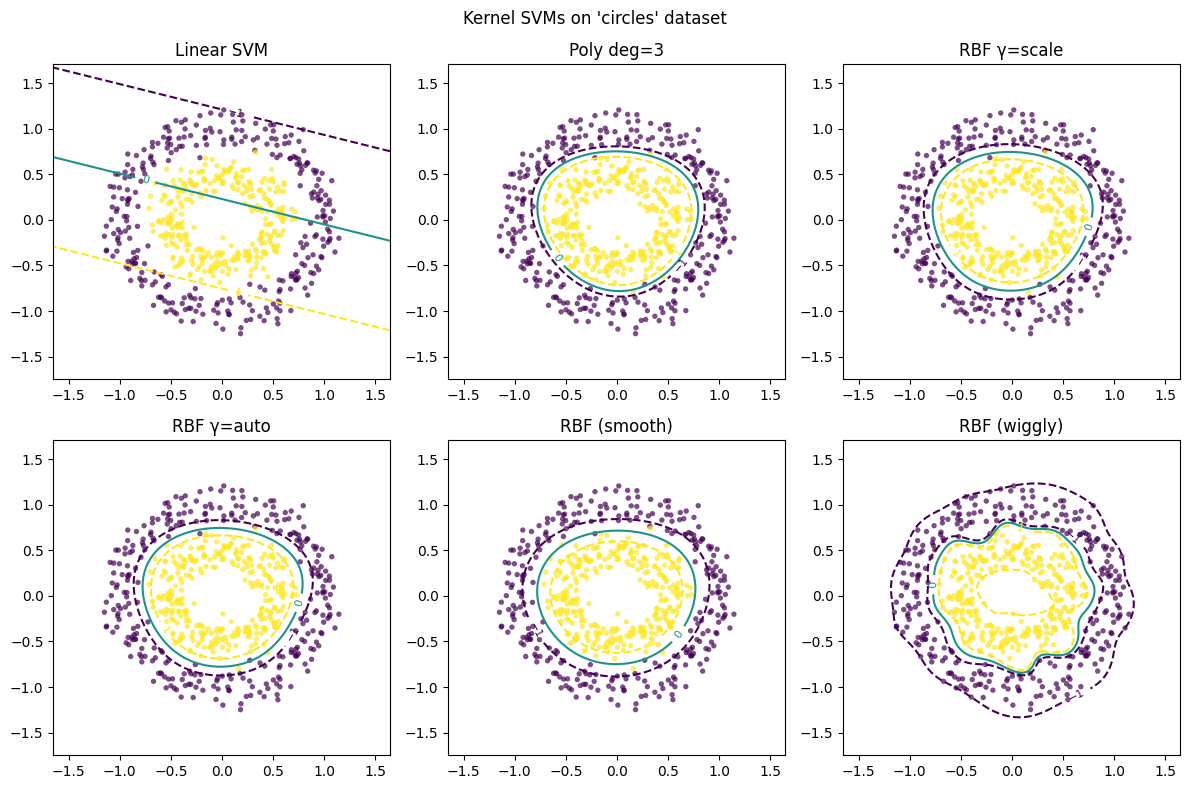

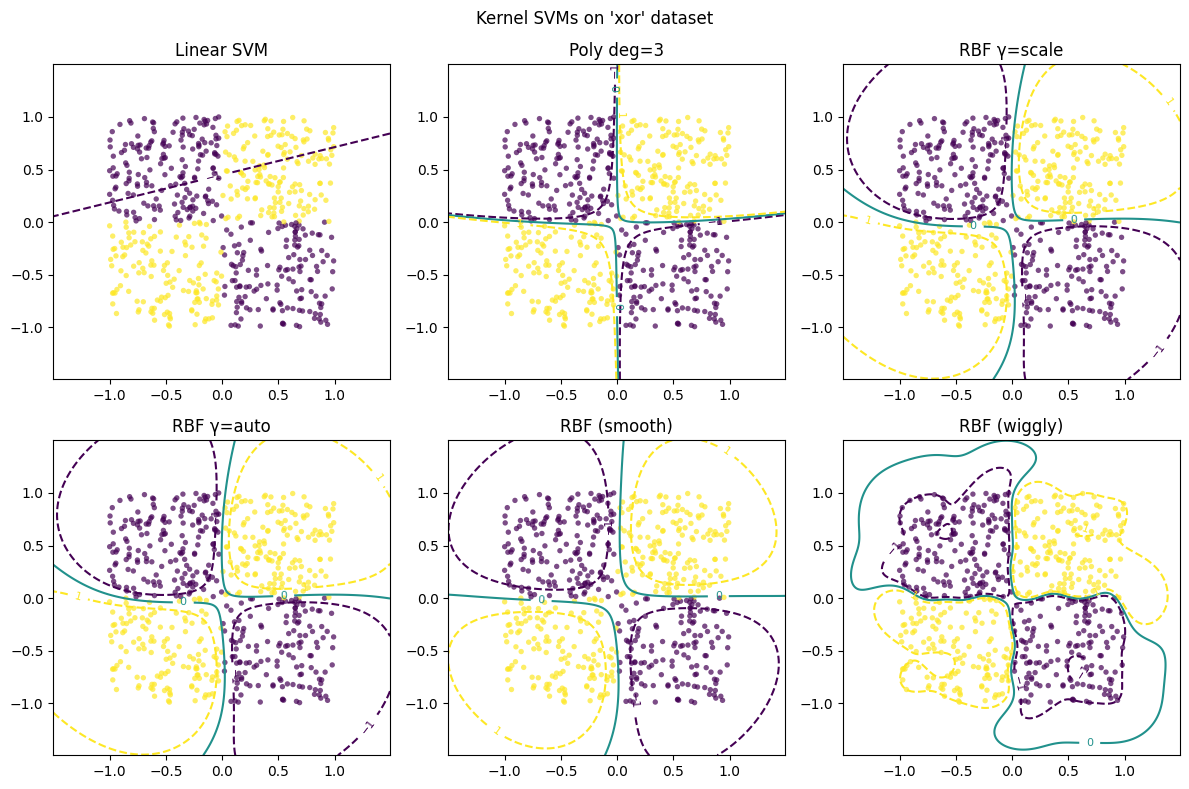

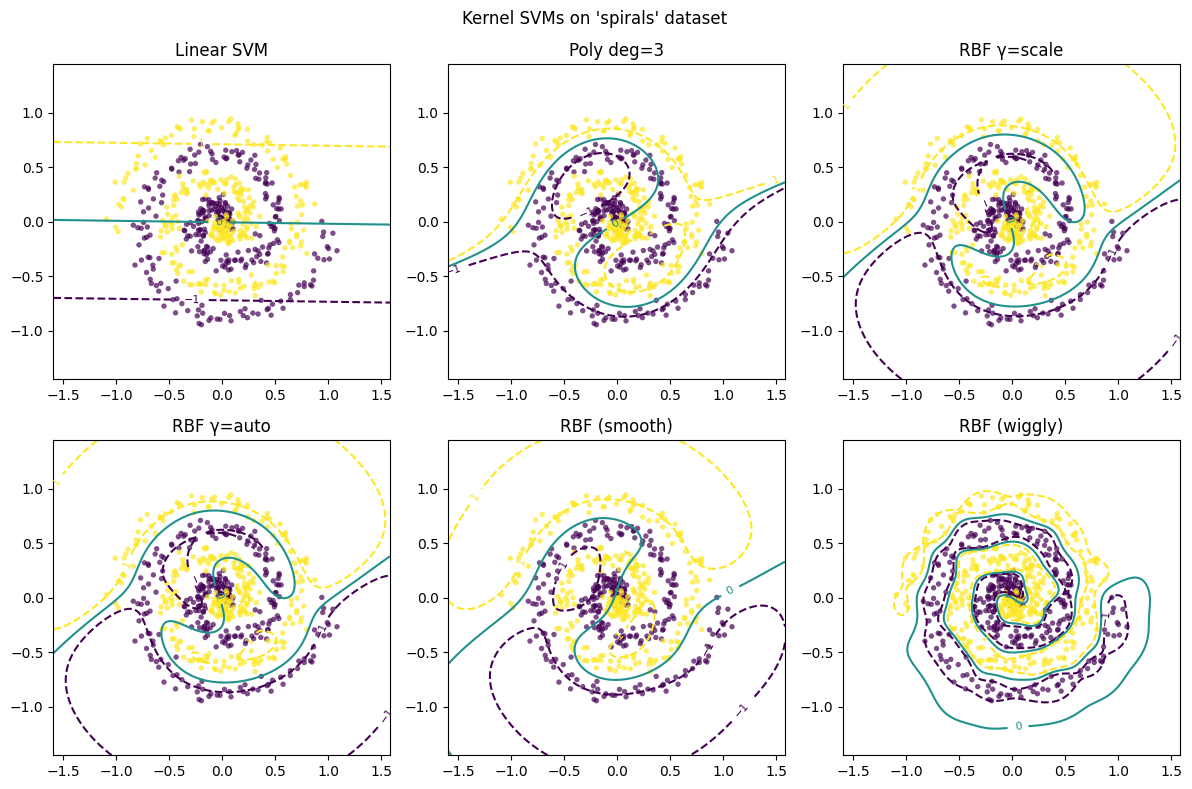

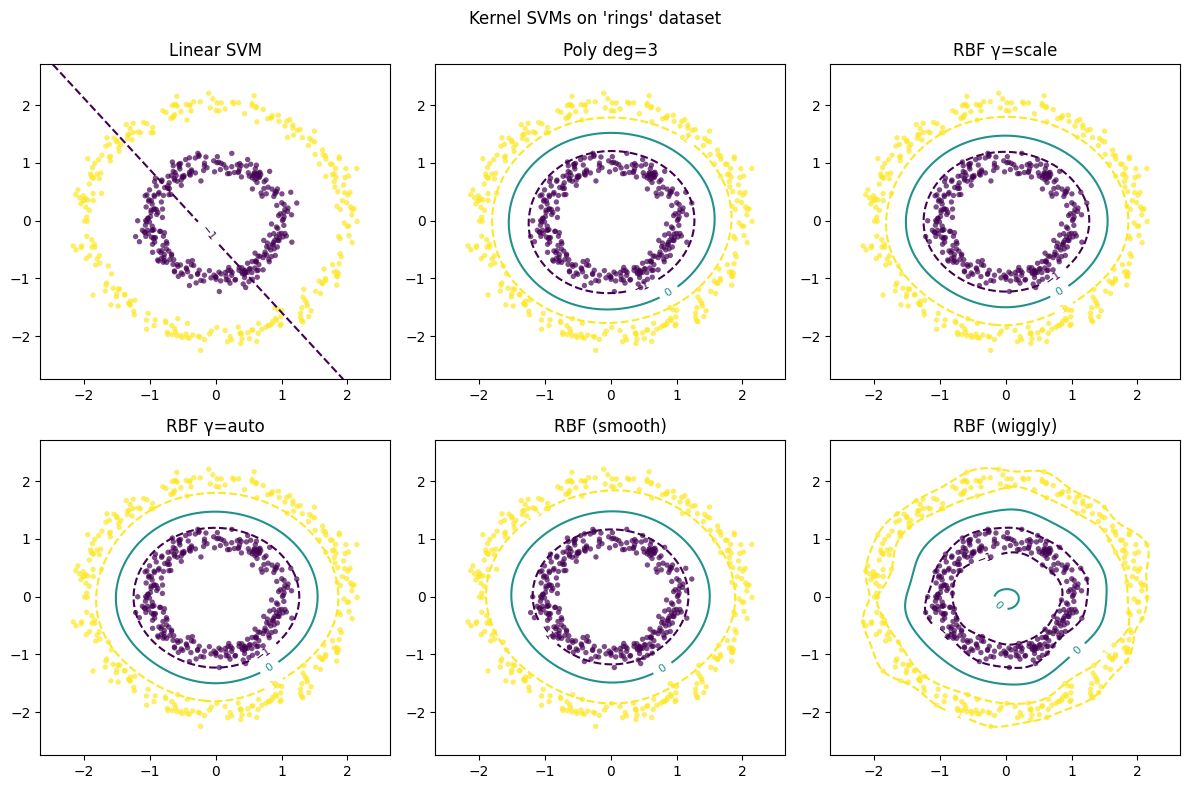

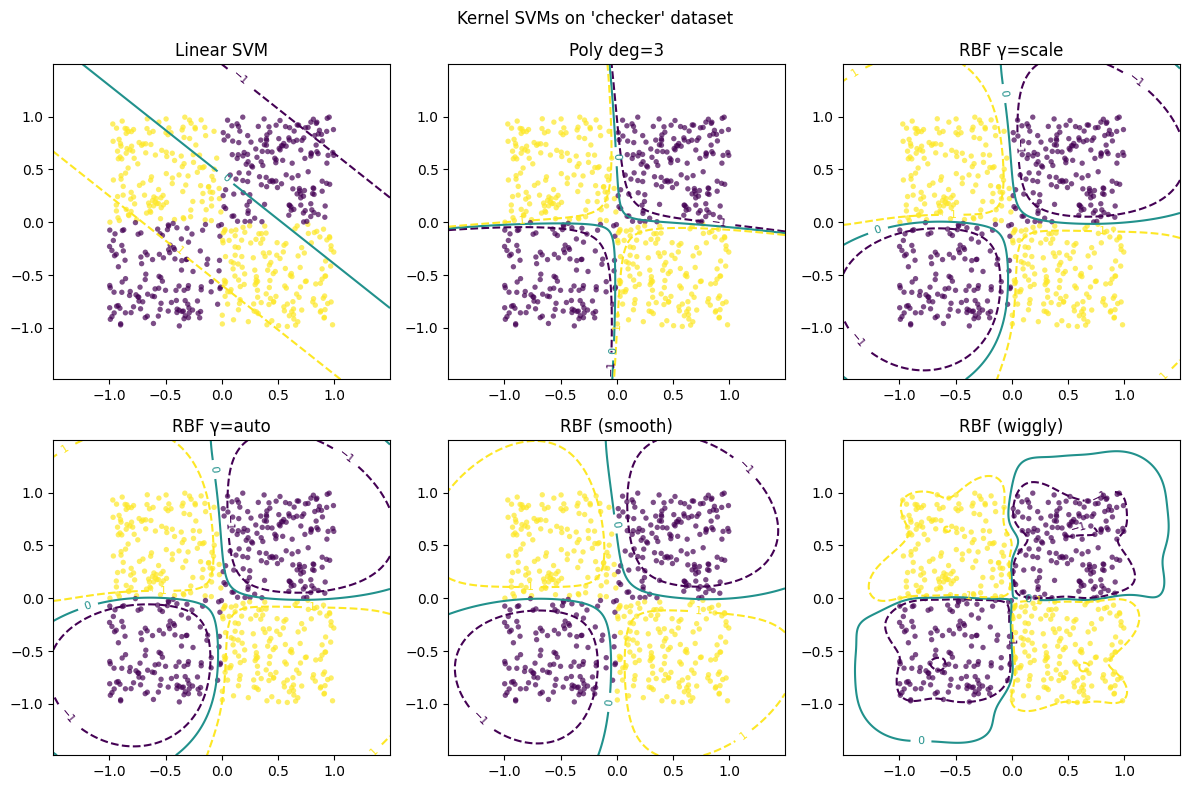

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles

# --- Додаємо визначення load_dataset ---
def load_dataset(name, n_samples=600, rng=None):
    if rng is None:
        rng = np.random.default_rng(0)

    if name == "moons":
        X, y = make_moons(n_samples=n_samples, noise=0.2, random_state=rng.integers(10000))
    elif name == "circles":
        X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.5, random_state=rng.integers(10000))
    elif name == "xor":
        X = rng.uniform(-1, 1, (n_samples, 2))
        y = (X[:, 0] * X[:, 1] > 0).astype(int)
    elif name == "spirals":
       n = n_samples // 2
       t = np.linspace(0, 4 * np.pi, n)
       t_col = t.reshape(-1, 1)  # робимо з t вектор-стовпець
       x1 = np.hstack([np.cos(t_col), np.sin(t_col)]) * t_col / (4 * np.pi)
       x2 = np.hstack([np.cos(t_col + np.pi), np.sin(t_col + np.pi)]) * t_col / (4 * np.pi)
       X = np.vstack([x1, x2]) + rng.normal(scale=0.05, size=(n_samples, 2))
       y = np.array([0]*n + [1]*n)
    elif name == "rings":
        angles = rng.uniform(0, 2*np.pi, n_samples)
        radii = rng.choice([1, 2], n_samples) + rng.normal(0, 0.1, n_samples)
        X = np.stack([radii*np.cos(angles), radii*np.sin(angles)], axis=1)
        y = (radii > 1.5).astype(int)
    elif name == "checker":
        X = rng.uniform(-1, 1, (n_samples, 2))
        y = ((X[:, 0] > 0) ^ (X[:, 1] > 0)).astype(int)
    else:
        raise ValueError(f"Unknown dataset: {name}")
    return X, y

# --- Функція для побудови межі рішень ---
def plot_decision_function(ax, model, X, y, title):
    # mesh
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # decision boundary & margins
    cs = ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"])
    ax.clabel(cs, inline=1, fontsize=8)
    # points
    ax.scatter(X[:,0], X[:,1], c=y, s=15, alpha=0.7, edgecolor="none")
    ax.set_title(title)

# --- Моделі для порівняння ---
models = [
    ("Linear SVM", make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0))),
    ("Poly deg=3", make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=5.0, coef0=1.0, gamma="scale"))),
    ("RBF γ=scale", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=5.0, gamma="scale"))),
    ("RBF γ=auto",  make_pipeline(StandardScaler(), SVC(kernel="rbf", C=5.0, gamma="auto"))),
    ("RBF (smooth)", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma=0.5))),
    ("RBF (wiggly)", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=50.0, gamma=5.0))),
]

# --- Генерація й візуалізація ---
N = 600
rng = np.random.default_rng(0)

for DATASET in ["moons", "circles", "xor", "spirals", "rings", "checker"]:
    X, y = load_dataset(DATASET, N, rng)

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()

    for ax, (name, clf) in zip(axes, models):
        clf.fit(X, y)
        plot_decision_function(ax, clf, X, y, name)

    plt.suptitle(f"Kernel SVMs on '{DATASET}' dataset")
    plt.tight_layout()
    plt.show()
